In [57]:
import pandas as pd
import numpy as np
import requests
import seaborn
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
df = pd.read_csv(r".\boston_housing.csv")

# Task 1

CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's

# Task 2

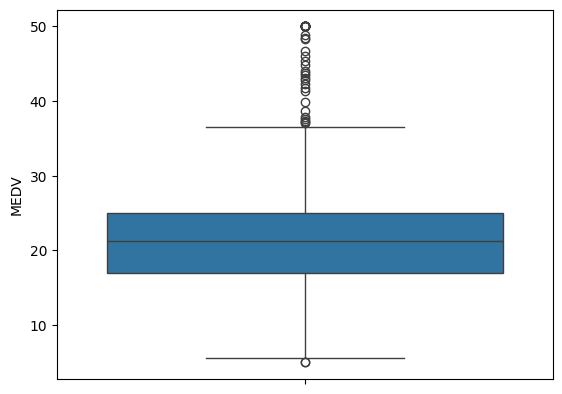

In [58]:
task2chart1 = seaborn.boxplot(y = 'MEDV', data = df)

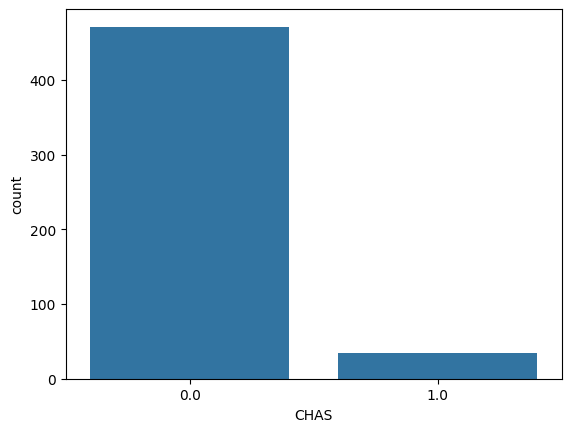

In [59]:
task2chart2 = seaborn.countplot(x = 'CHAS', data = df)

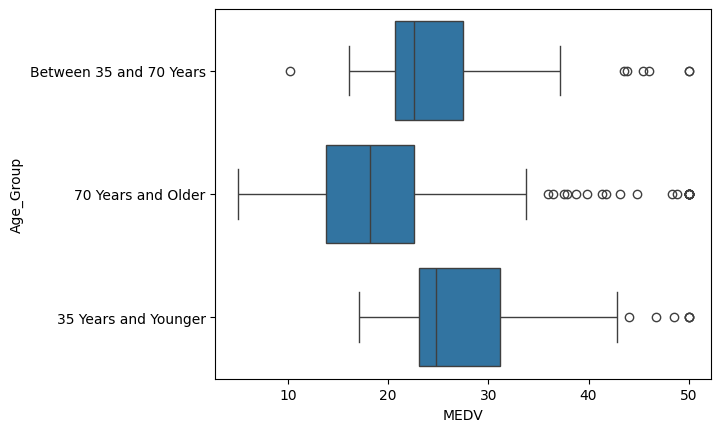

In [60]:
df.loc[(df['AGE'] <= 35), 'Age_Group'] = '35 Years and Younger'
df.loc[(df['AGE'] > 35) & (df['AGE'] < 70), 'Age_Group'] = 'Between 35 and 70 Years'
df.loc[(df['AGE'] >= 70), 'Age_Group'] = '70 Years and Older'
task2chart3 = seaborn.boxplot(x = 'MEDV', y = 'Age_Group', data = df)

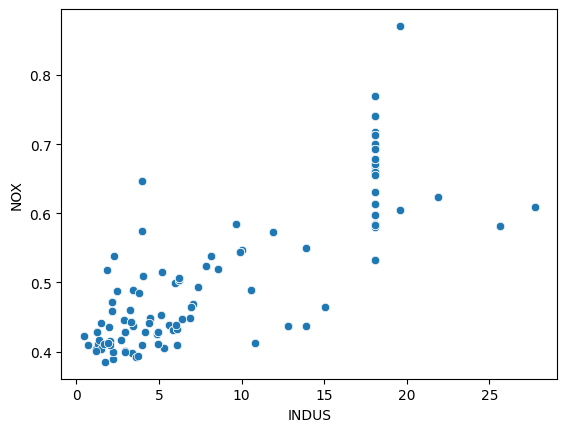

In [61]:
task2chart4 = seaborn.scatterplot(y = 'NOX', x = 'INDUS', data = df)

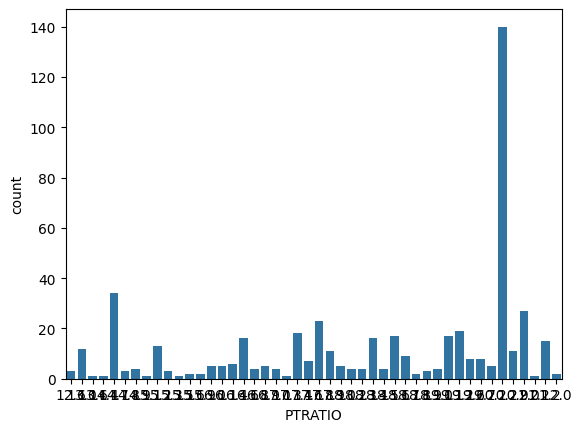

In [62]:
task2chart5 = seaborn.countplot(x = 'PTRATIO', data = df)

# Task 3

##### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Null: No difference in median value between houses bounded by Charles river.

Alternative: There is a big difference.

Conclusion: P Value < 0.05 so the Null is rejected

In [64]:
df.loc[(df['CHAS'] == 0), 'CHAS_T'] = 'FAR'
df.loc[(df['CHAS'] == 1), 'CHAS_T'] = 'NEAR'
scipy.stats.ttest_ind(df[df['CHAS_T'] == 'FAR']['MEDV'], df[df['CHAS_T'] == 'NEAR']['MEDV'], equal_var = True)

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

##### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Null: No difference between MEDV for each proportion of owner occupied units built prior to 1940.

Alternative: There is a statistical difference in MEDV for each proportion of owner occupied units built prior to 1940.

Conclusion: P value < 0.05, so fail to accept the null.

In [65]:
from statsmodels.formula.api import ols
lm = ols('MEDV ~ AGE', data = df).fit()
table = sm.stats.anova_lm(lm)
print(table)

             df        sum_sq      mean_sq          F        PR(>F)
AGE         1.0   6069.761065  6069.761065  83.477459  1.569982e-18
Residual  504.0  36646.534350    72.711378        NaN           NaN


#### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

Null: Nitric Oxide concentration isn't correlated with the proportion of non-retail business acres.

Alternative: Nitric Oxide concentration is correlated with the proportion of non-retail business acres per town

P value less than 0.05 means the null hypothesis can be rejected.

In [66]:
scipy.stats.pearsonr(df['NOX'], df['INDUS'])

PearsonRResult(statistic=0.763651446920915, pvalue=7.913361061241532e-98)

#### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Null: There is no impact to the median value based off extra weighted distance.

Alternative: There is an impact to the median value based off the extra weighted distance.

Conclusion: The weighted distance to the employment centers increases median value by 1.09 per the COEF DIS.

In [69]:
x = df['DIS']
y = df['MEDV']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predisction = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 05 Nov 2024   Prob (F-statistic):           1.21e-08
Time:                        17:17:53   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""